# 回帰分析のスニペット

## ライブラリインポート  
※未インストールの場合は、ノート上で !pip install numpy のようにインストールできる。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# サンプル１

## サンプルデータロード

In [2]:
df = pd.read_csv('data/modified_marketing_and_sales_data.csv')

In [3]:
df.head(5)

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## データ確認

In [4]:
df.shape

(4572, 4)

In [5]:
df.describe(include='all')

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


## 欠損値（N/A）確認

In [6]:
df.isna().sum()

TV              10
Radio            4
Social_Media     6
Sales            6
dtype: int64

### 欠損値を含む行だけを表示

In [7]:
df[df.isna().any(axis=1)]

,TV,Radio,Social_Media,Sales
13,NaN,22.351667,3.031815,276.165351
26,NaN,34.111674,4.624148,342.913372
46,NaN,34.859637,7.781417,318.969784
75,NaN,6.482293,0.866845,91.177216
99,NaN,7.635819,1.554146,56.186730
119,NaN,30.470485,6.806919,336.818690
141,NaN,9.164464,1.096681,65.259189
163,NaN,38.118424,6.676611,328.555184
182,81.0,26.425422,NaN,288.649441
183,NaN,1.287060,0.396179,56.545293


## 欠損値の割合

In [8]:
missing_sales = df.Sales.isna().mean()
missing_sales = round(missing_sales*100, 2)
print('Salesの欠損値の割合: ' +  str(missing_sales) + '%')

Salesの欠損値の割合: 0.13%


## 欠損している行を削除

In [9]:
df = df.dropna(subset = ['Sales'], axis = 0)

## ヒストグラム

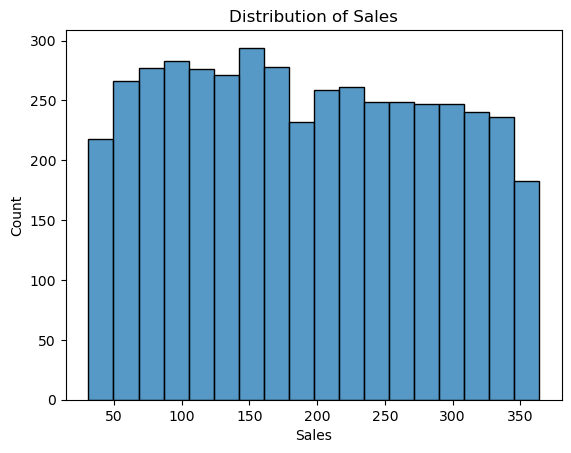

In [10]:
fig = sns.histplot(df['Sales'])
fig.set_title('Distribution of Sales');

## ペアプロット

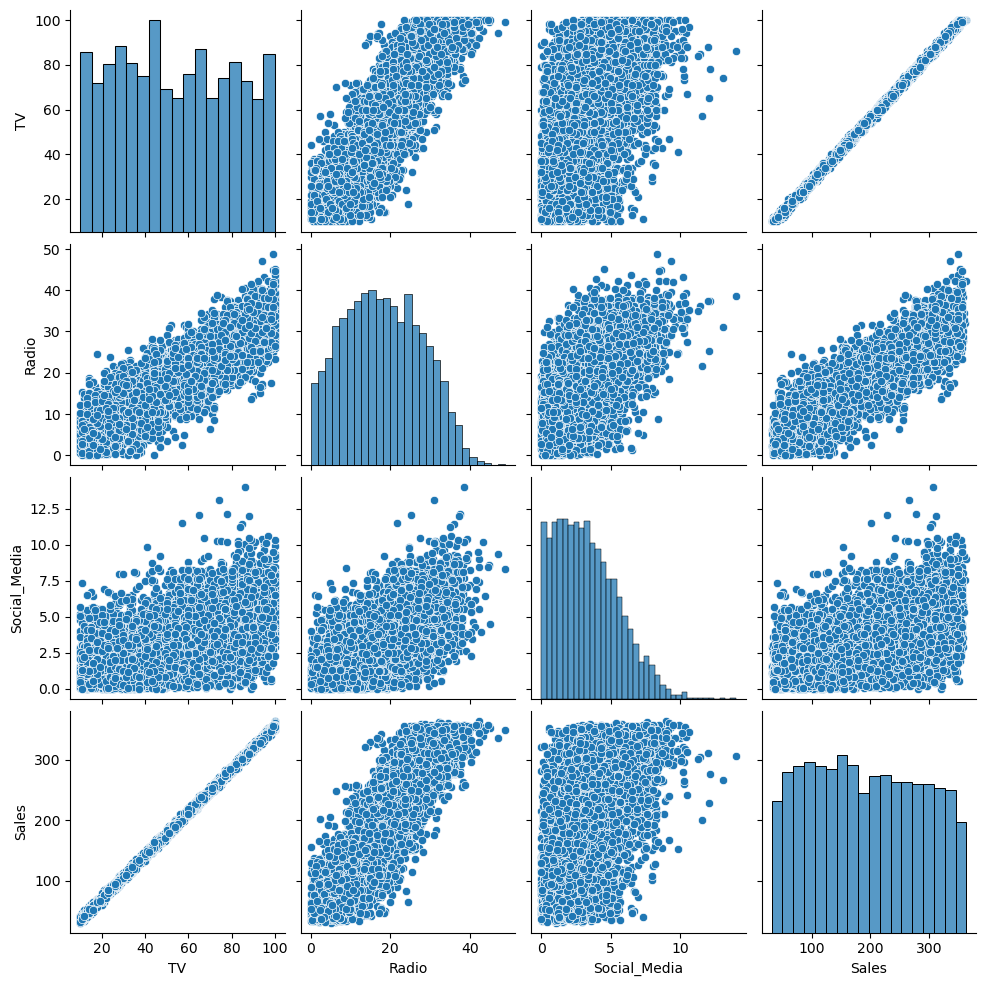

In [11]:
sns.pairplot(df);

## 相関行列

In [12]:
df.corr(method='pearson')

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869265,0.527904,0.999497
Radio,0.869265,1.000000,0.607415,0.869105
Social_Media,0.527904,0.607415,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


## 相関のヒートマップ

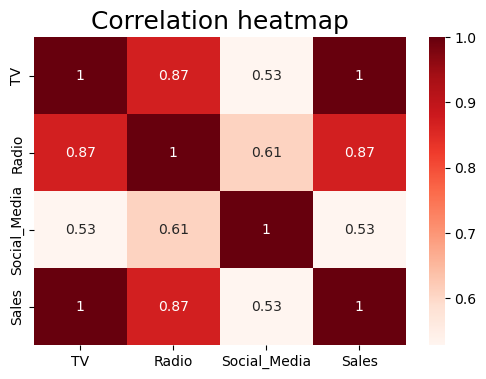

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

* TVとRadioは強い相関がある
* Salesに対して相関が強いのは、TV、Radio、Socialメディアの順

## TVとSalesの回帰分析

### モデル

In [14]:
ols_formula = 'Sales ~ TV'
OLS = ols(formula = ols_formula, data = df)
model = OLS.fit()

### モデルの仮定 - 線形性

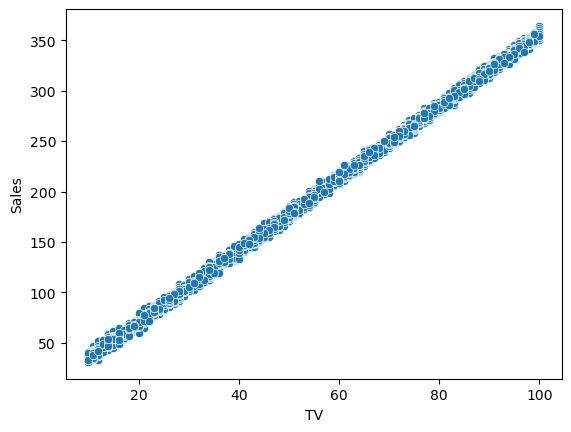

In [15]:
sns.scatterplot(x = df['TV'], y = df['Sales']);

### モデルの仮定 - 正規性

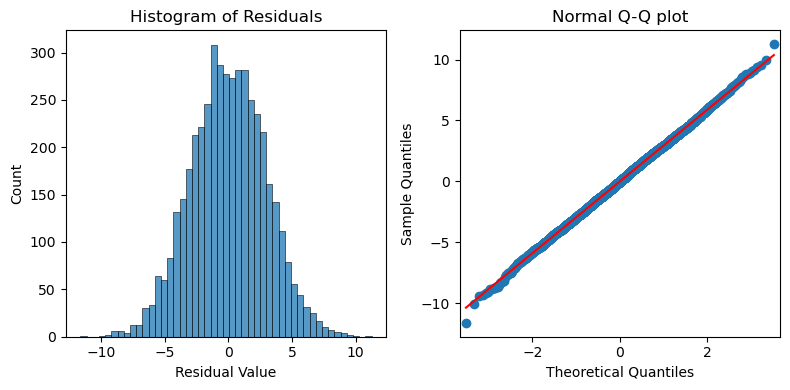

In [16]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# ヒストグラム
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# QQプロット。2つのデータセットの分布がどれだけ似ているか。
sm.qqplot(residuals, line='s', ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

### モデルの仮定 - 等分散性

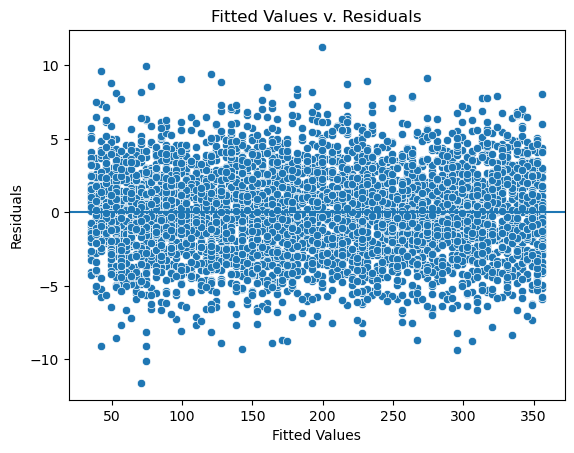

In [17]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

### サマリー

In [18]:
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:56:46   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

→ 傾き 3.5614、切片 -0.1263

<Axes: xlabel='TV', ylabel='Sales'>

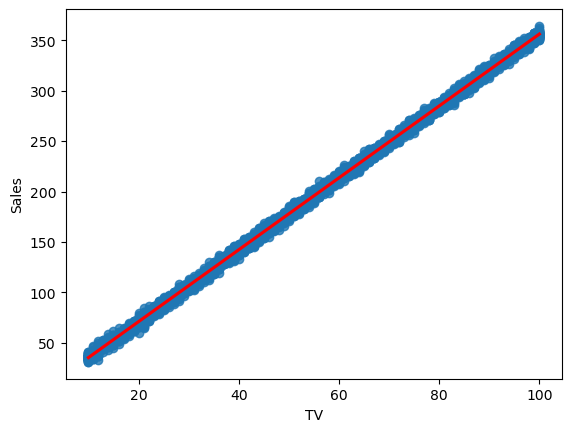

In [19]:
ols_data = df[['TV', 'Sales']]
sns.regplot(x = "TV", y = "Sales", data = ols_data, line_kws={"color": "red"})

# サンプル２

## サンプルデータ２ロード

In [20]:
data = pd.read_csv('data/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


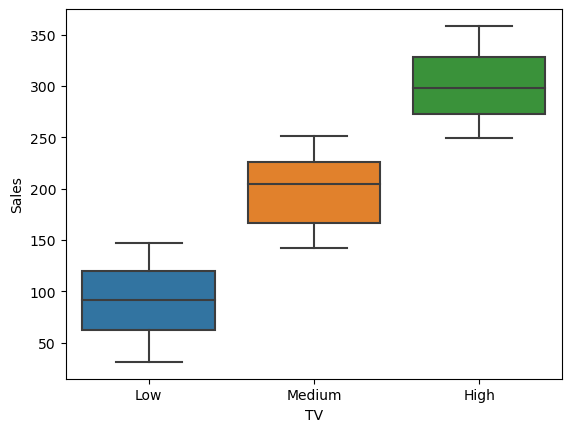

In [21]:
sns.boxplot(x = "TV", y = "Sales", data = data);

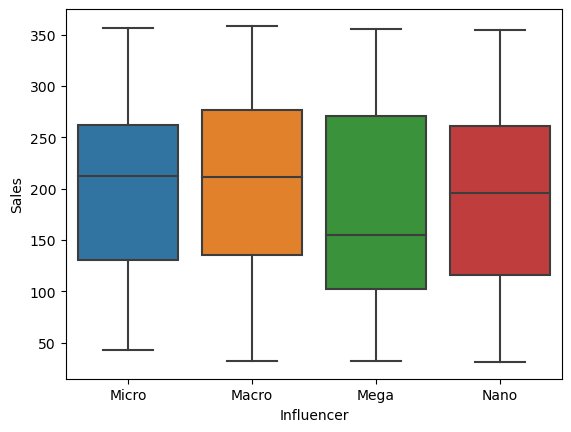

In [22]:
sns.boxplot(x = "Influencer", y = "Sales", data = data);

In [23]:
data = data.dropna(axis=0)
data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## モデルビルディング

In [24]:
ols_formula = 'Sales ~ C(TV)'
OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()

## モデルの仮定

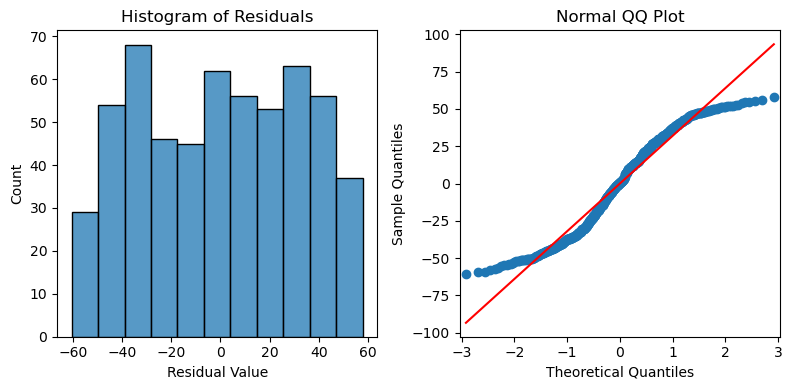

In [25]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

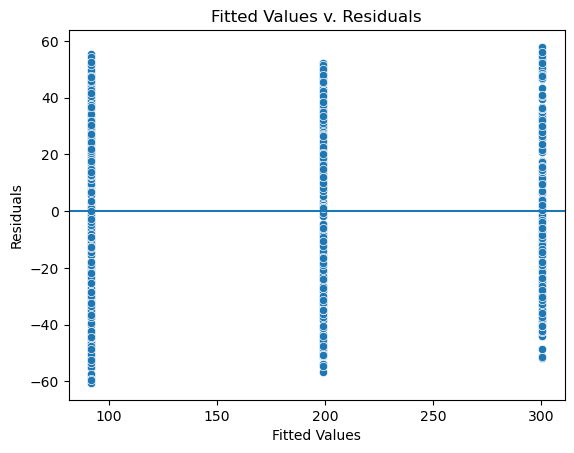

In [26]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

## サマリー

In [27]:
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          8.81e-256
Time:                        11:56:47   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1元配置分散分析（One-way ANOVA）

In [28]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


## ANOVA 事後検定（ANOVA post hoc test）

In [29]:
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"], alpha=0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


rejectは、帰無仮説が棄却されるという意味。  
つまりHigh/Medium/Low全ての組み合わせで有意差があるという結論。

# カイ2乗検定

In [30]:
# 例：曜日によって売り上げに違いはないという帰無仮説
Observations = [650, 570, 420, 480, 510, 380, 490]
Expectations = [500, 500, 500, 500, 500, 500, 500]
Result = stats.chisquare(f_obs = Observations, f_exp = Expectations)
print(Result)

Power_divergenceResult(statistic=97.6, pvalue=7.943886923343835e-19)


In [31]:
# 横軸：メンバー、ゲスト
# 縦軸：Mac、Windows
# Webサイトユーザーが使用するデバイスは、メンバーシップ状態と関係ないという帰無仮説
Observations = np.array([[850, 450],
                         [1300, 900]])
Result = stats.contingency.chi2_contingency(Observations)
print(Result)

Chi2ContingencyResult(statistic=13.396423236539514, pvalue=0.0002521045757089368, dof=1, expected_freq=array([[ 798.57142857,  501.42857143],
       [1351.42857143,  848.57142857]]))


pvalue から、ともに帰無仮説が棄却される。

# One-hot エンコーディング

In [32]:
df_original = pd.read_csv("data/Invistico_Airline.csv")
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [33]:
df_original['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [34]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
